In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
#Fonction qui permet d'afficher une image
def imshow(I,title=None,size=500):
    plt.figure(figsize=(size//80,size//80))
    plt.gray()
    plt.imshow(I)
    if title: plt.title(title)
    plt.show()

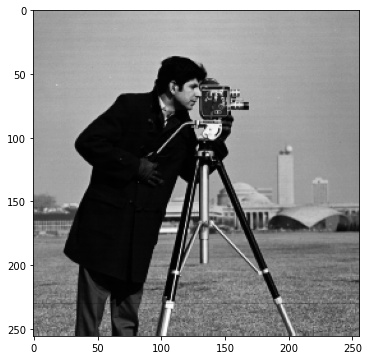

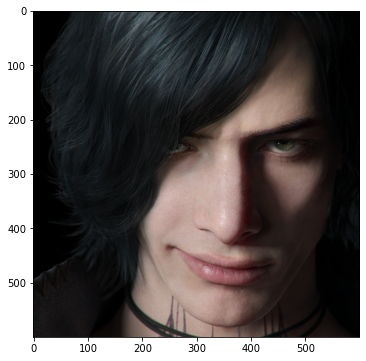

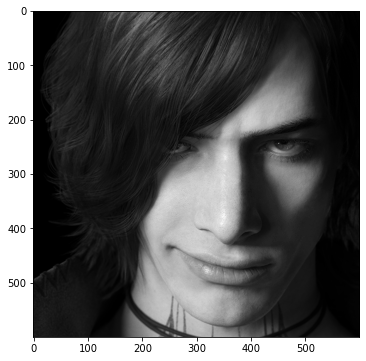

In [13]:
cameraman = np.array(Image.open('cameraman.png')) #importer l'image du Cameraman
v = np.array(Image.open('v.png')) #importer l'image de V qui est en couleur
v_grayscaled = v.mean(axis = 2) #Créer une variation de V en noir et blanc, cela a été fait en calculant la moyenne des valeurs de chaque canal      
imshow(cameraman) #Afficher l'image du Cameraman
imshow(v) #Afficher l'image de V 
imshow(v_grayscaled) #Afficher l'image de V en noir et blanc

L'entropie $E$ d'une image $I$ en niveaux de gris se calcule par la formule suivante : 
$E(I) = -\sum\limits_{i} p_i * log_2(p_i)$ ou $p_i$ est la probabilité du pixel $i$ tirée à partir de l'histogramme normalisé de l'image $I$

In [3]:
#Fonction pour calculer l'entropie d'une image en niveau de gris
def entropy_bw(I):
    #p = np.array([(I == x).sum() for x in range(256)]) #calcul d'histogramme
    p, _ = np.histogram(I, bins = 256)
    p = p/p.sum() #normalisation de l'histogramme
    ent_I = -(np.sum(p[p>0]*np.log2(p[p>0]))) #calcul de l'entropie
    return ent_I

In [103]:
print('L\'entropie de l\'image du Cameraman : ', entropy_bw(cameraman))

L'entropie de l'image du Cameraman :  7.009716283345515


In [52]:
print('L\'entropie de l\'image de V en noir et blanc : ', entropy_bw(v_grayscaled))

L'entropie de l'image de V en noir et blanc :  6.874731288028519


Pour calculer l'entropie d'une image en couleur, nous avons essayé de calculer l'entropie dans chaque canal (RGB) et faire la moyenne des trois entropies par la suite.

In [17]:
import timeit

In [4]:
#Fonction pour calculer l'entropie d'une image en couleur
def entropy_color(I, k):
    I = I/k #Réduire la dynamique de l'image en la divisant par k
    I = I.astype(int) # Ne garder que la partie entière des valeurs
    p_values = int(256/k)
    H_3d = np.zeros((p_values,p_values,p_values)) # Initialiser l'histogramme 3D par la nouvelle dynamique
    print(H_3d.shape)
    for i in range(I.shape[0]):
        for j in range(I.shape[1]):
            x = I[i,j] # x est un pixel qui a trois valeurs R G B
            H_3d[x[0],x[1],x[2]] += 1 #on va incrémenter le nombre des valeurs R G B sur l'histogramme3D
            
    p = H_3d/H_3d.sum() # On normalise l'histogramme
    entropy = -((p[p>0])*np.log2(p[p>0])).sum() # et on calcule l'entropie

    return entropy

In [91]:
ent32 = entropy_color(v,8)
ent64 = entropy_color(v,4)
ent128 = entropy_color(v,2)
ent256 = entropy_color(v,1)
print('L\'entropie de l\'image de V en couleur, dynamique = 32: ', ent32)
print('L\'entropie de l\'image de V en couleur, dynamique = 64: ', ent64)
print('L\'entropie de l\'image de V en couleur, dynamique = 128: ', ent128)
print('L\'entropie de l\'image de V en couleur, dynamique = 256: ', ent256)
print()
print('L\'entropie de l\'image de V en couleur, dynamique = 256 from 32: ', ent32 * np.log2(8))
print('L\'entropie de l\'image de V en couleur, dynamique = 256 from 64: ', ent64 * np.log2(4))
print('L\'entropie de l\'image de V en couleur, dynamique = 256 from 128: ', ent128 * np.log2(2))

L'entropie de l'image de V en couleur, dynamique = 32:  6.612076243685409
L'entropie de l'image de V en couleur, dynamique = 64:  8.800942842976204
L'entropie de l'image de V en couleur, dynamique = 128:  11.257148677962164
L'entropie de l'image de V en couleur, dynamique = 256:  13.663026997955775

L'entropie de l'image de V en couleur, dynamique = 256 from 32:  19.836228731056227
L'entropie de l'image de V en couleur, dynamique = 256 from 64:  17.601885685952407
L'entropie de l'image de V en couleur, dynamique = 256 from 128:  11.257148677962164


In [20]:
i2449 = np.array(Image.open('2449.jpg'))
i33761 = np.array(Image.open('33761.jpg'))
print(i33310.sum())
print(i33761.sum())

201939
78


[921579      9      0      9      0      0      0      0      0      3]
[ 0.  6. 12. 18. 24. 30. 36. 42. 48. 54. 60.]


ValueError: shape mismatch: objects cannot be broadcast to a single shape

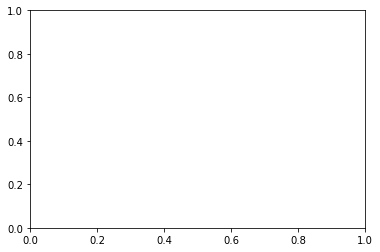

In [16]:
p, c = np.histogram(i33310)
print(p)
print(c)
plt.figure()
plt.bar(c, p)
plt.show()

In [7]:
entropy_bw(i33310)

0.7595085664545207

In [8]:
entropy_bw(i33761)

0.0006404130288506271

In [9]:
entropy_color(i33310, 4)

(64, 64, 64)


0.0011030566308720983

In [10]:
entropy_color(i33761, 4)

(64, 64, 64)


0.00018559414082309136

In [100]:
#Fonction pour calculer l'entropie d'une image en couleur
def entropy_color(I):
    print(I.shape)
    H_3dR , x = np.histogram(I[:,:,0], bins = (256))  
    H_3dG , x = np.histogram(I[:,:,0], bins = (256))   
    H_3dB , x = np.histogram(I[:,:,0], bins = (256))   
            
    H_3d = np.stack([H_3dR,H_3dG,H_3dB])
    
    print(H_3d.shape)
    p = H_3d/H_3d.sum() # On normalise l'histogramme
    entropy = -((p[p>0])*np.log2(p[p>0])).sum() # et on calcule l'entropie

    return entropy


print('L\'entropie de l\'image de V en couleur, dynamique = 256: ', entropy_color(v))

(600, 600, 3)
(3, 256)
L'entropie de l'image de V en couleur, dynamique = 256:  8.38279737188748


In [68]:
import timeit
v_C = v.copy()

In [27]:
def entropy_bw():
    v_bwC = v_grayscaled.copy()
    p = np.array([(v_bwC == x).sum() for x in range(256)]) #calcul d'histogramme
    p = p/p.sum() #normalisation de l'histogramme
    ent_I = -(np.sum(p[p>0]*np.log2(p[p>0]))) #calcul de l'entropie
    #ent_I = -(np.sum((p+eps)*np.log2(p+eps))) #calcul de l'entropie
    return ent_I

def entropy_color():
    v_C = v.copy()
    v_C = v_C/4 #Réduire la dynamique de l'image en la divisant par k
    v_C = v_C.astype(int) # Ne garder que la partie entière des valeurs
    p_values = int(256/4)
    H_3d = np.zeros((p_values,p_values,p_values)) # Initialiser l'histogramme 3D par la nouvelle dynamique
    
    for i in range(v_C.shape[0]):
        for j in range(v_C.shape[1]):
            x = v_C[i,j] # x est un pixel qui a trois valeurs R G B
            H_3d[x[0],x[1],x[2]] += 1 #on va incrémenter le nombre des valeurs R G B sur l'histogramme3D
            
    p = H_3d/H_3d.sum() # On normalise l'histogramme
    entropy = -(np.sum(p[p>0]*np.log2(p[p>0]))) # et on calcule l'entropie
    #entropy = -(np.sum((p+eps)*np.log2(p+eps))) #calcul de l'entropie

    return entropy

   

        
def testEntropyColor(n):
    for i in range(n):
        e = entropy_color()
        

In [47]:
def entropy_bw():
    v_bwC = v_grayscaled.copy()
    p, _ = np.histogram(v_bwC, bins = 256)
    p = p/p.sum() #normalisation de l'histogramme
    ent_I = -(np.sum(p[p>0]*np.log2(p[p>0]))) #calcul de l'entropie
    #ent_I = -(np.sum((p+eps)*np.log2(p+eps))) #calcul de l'entropie
    return ent_I

In [48]:
def testEntropyBW(n):
    for i in range(n):
        e = entropy_bw()

In [49]:
%timeit testEntropyBW(10)

106 ms ± 5.78 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [43]:
%timeit testEntropyColor(100)

1min 34s ± 4.66 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [27]:
n = 10

t3 = timeit.timeit(entropy_bw, number = n)
print ('ENTROPY BW:', t3)
t4 = timeit.timeit(entropy_color, number = n)
print ('ENTROPY C:', t4)

ENTROPY BW EPS: 2095.8242793000004
ENTROPY C EPS: 7057.565742500001
ENTROPY BW: 1930.5107492000006
ENTROPY C: 7148.888080100001


In [28]:
n = 2000

t1 = timeit.timeit(entropy_bwEPS, number = n)
print ('ENTROPY BW EPS:', t1)
t2 = timeit.timeit(entropy_colorEPS, number = n)
print ('ENTROPY C EPS:', t2)


t3 = timeit.timeit(entropy_bw, number = n)
print ('ENTROPY BW:', t3)
t4 = timeit.timeit(entropy_color, number = n)
print ('ENTROPY C:', t4)

ENTROPY BW EPS: 373.6323639999973
ENTROPY C EPS: 1413.341440600001
ENTROPY BW: 442.2682632000069
ENTROPY C: 1430.8495373999976


In [29]:
n = 1000

t1 = timeit.timeit(entropy_bwEPS, number = n)
print ('ENTROPY BW EPS:', t1)
t2 = timeit.timeit(entropy_colorEPS, number = n)
print ('ENTROPY C EPS:', t2)


t3 = timeit.timeit(entropy_bw, number = n)
print ('ENTROPY BW:', t3)
t4 = timeit.timeit(entropy_color, number = n)
print ('ENTROPY C:', t4)

ENTROPY BW EPS: 254.66245720000006
ENTROPY C EPS: 788.6357467999987
ENTROPY BW: 195.04439220000495
ENTROPY C: 663.8298570999978
